# Support Vector machine

In [271]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
import pandas as pd
sns.set(style='darkgrid')
%matplotlib inline

In [272]:
data_tmp = loadmat('data/ex6data1.mat')

In [273]:
X = data_tmp['X']
y = data_tmp['y']

In [274]:
data = pd.DataFrame(data=X, columns=['X1', 'X2'])
data['y'] = y

In [275]:
data.head()

,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


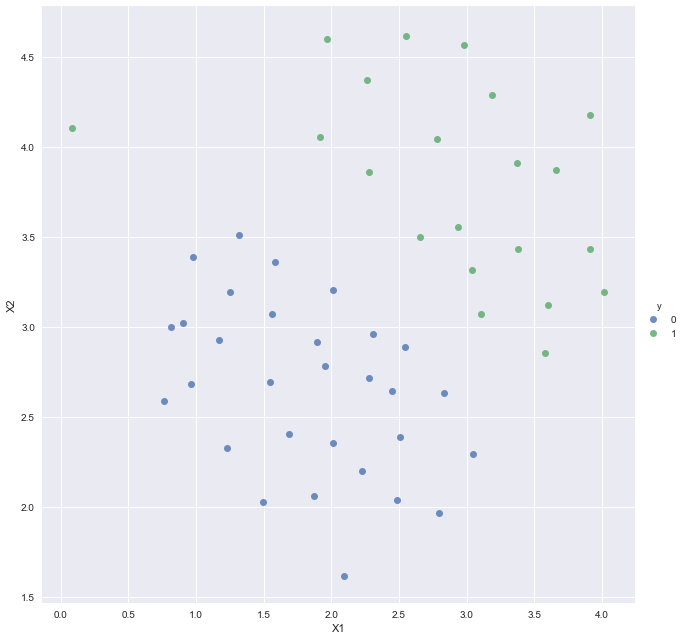

In [276]:
vis = sns.lmplot(x='X1', y='X2', data=data, hue='y', fit_reg=False, size=9)

In [277]:
from sklearn import svm
svc1 = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
svc1

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [278]:
svc1.fit(X, y.ravel())
svc1.score(X, y)

0.98039215686274506

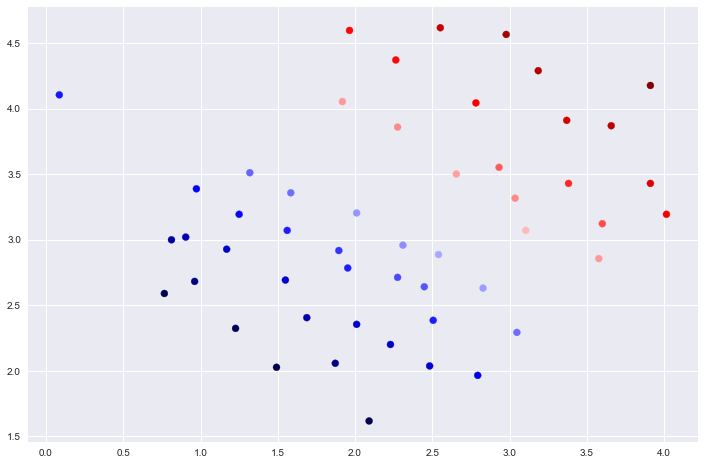

In [279]:
data['svm_confidence1'] = svc1.decision_function(X)
plt.figure(figsize=[12,8])
#vis = sns.lmplot(x='X1', y='X2', data=data, hue='svm_confidcence', fit_reg=False)
plt.scatter(data.X1, data.X2, c=data.svm_confidence1, cmap='seismic')

As we can see the outlier has been mis-classified hence we can try increasing c to 100

In [280]:
svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
svc2

LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [281]:
svc2.fit(X, y.ravel())
svc2.score(X, y)

0.98039215686274506

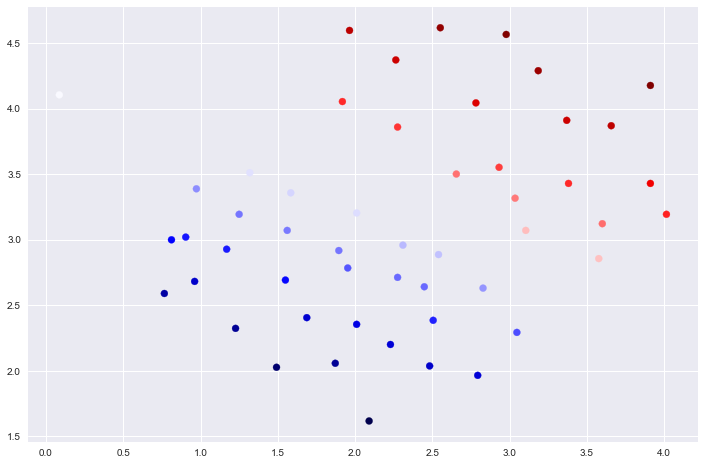

In [282]:
data['svm_confidence2'] = svc2.decision_function(X)
plt.figure(figsize=[12,8])
plt.scatter(x=data.X1, y=data.X2, c=data.svm_confidence2, cmap='seismic')

Now the outlier has been correctly classified!!!

# Now lets Try on the next dataset

In [283]:
data_tmp = loadmat('data/ex6data2.mat')

In [284]:
data = pd.DataFrame(data=data_tmp['X'], columns=[['X1', 'X2']])
data['y'] = data_tmp['y']
data.head()

,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


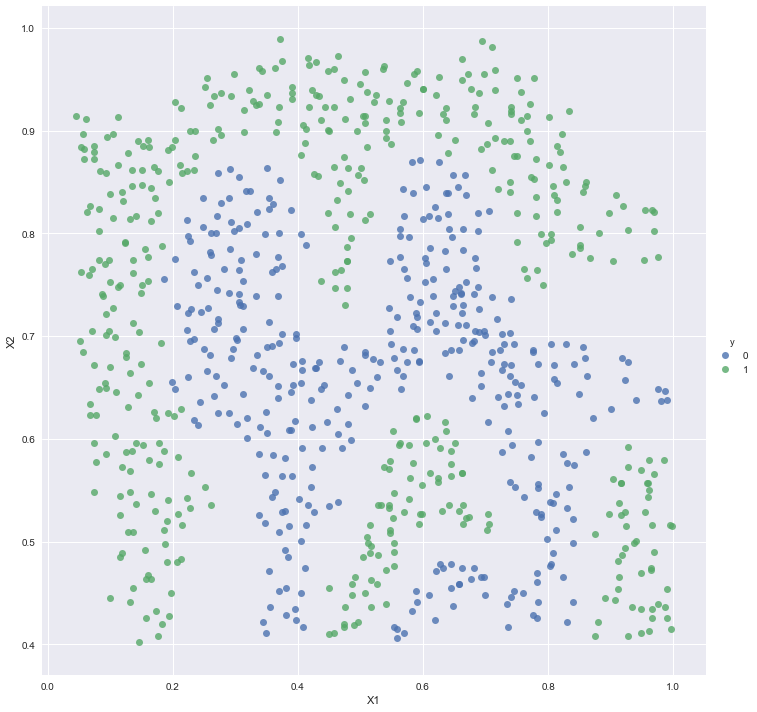

In [285]:
vis = sns.lmplot(x='X1', y='X2', hue='y', data=data, fit_reg=False, size=10)

As we can see the data cannot be classified using linear kernel, Hence we will use RBF kernel

In [290]:
svc = svm.SVC(C=100, gamma=10, probability=True)
svc

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [287]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.9698725376593279

In [288]:
prob =  svc.predict_proba(data[['X1', 'X2']])[:,0]

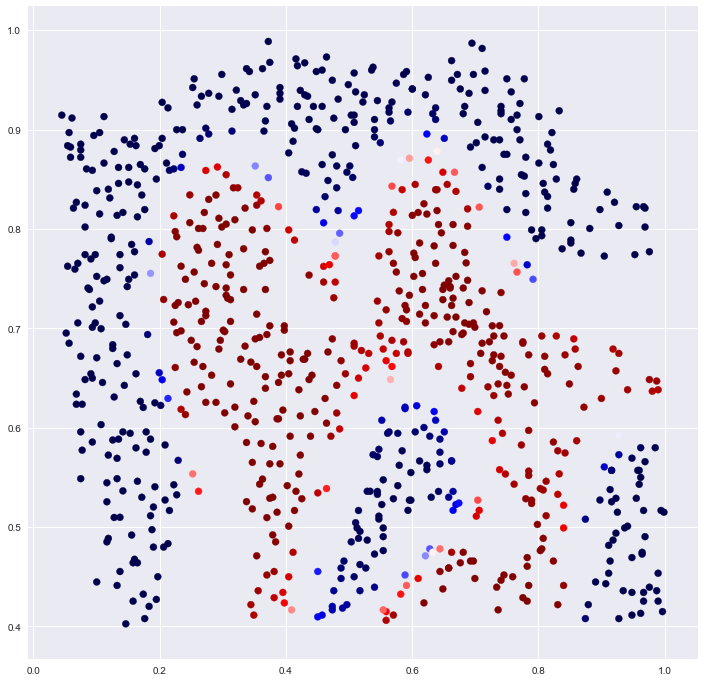

In [295]:
plt.figure(figsize=[12,12])
plt.scatter(x=data.X1, y=data.X2, c=prob, cmap='seismic')

As we can see our dataset is classified successfully